<a href="https://colab.research.google.com/github/vcngeno/Analytics_Programming/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the data & pick-up from HW2


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from datetime import datetime, date, time
import seaborn as sns

In [2]:
# Read the header file (assuming it's a CSV with one row)
df_header = '/content/headers.txt'
headers = pd.read_csv(df_header, header=None).iloc[0].tolist()

In [3]:
# Read the data file (assuming it's a CSV without headers)
df_data = '/content/drive/MyDrive/rawdata.csv'
data = pd.read_csv(df_data, header=None, sep = '\t', on_bad_lines='skip')

In [4]:
from datetime import datetime, date, time


In [5]:
datetime.strptime("20091031", "%Y%m%d")

datetime.datetime(2009, 10, 31, 0, 0)

In [6]:
datetime(2009, 10, 31, 0, 0)

datetime.datetime(2009, 10, 31, 0, 0)

In [7]:
data.columns = headers

In [8]:
# check count break down by ticker
data.groupby('ticker').agg({'datetime':'count'} ).head()

,datetime
ticker,
A,23700
AA,23700
AAMRQ,19750
AAN,7900
AAP,23700


In [9]:
full_tickers = list(set(data['ticker']))
len(full_tickers)

1708

In [10]:
# Check just records for Apple
ticker = 'AAPL'
ticker_data = data[(data['ticker']==ticker)& (data['time'] <= 160000)]

In [11]:
print('%s %s' %(ticker, len(ticker_data) ) )
print('First time: %s, Last time: %s' %(  min(ticker_data['datetime']), max(ticker_data['datetime'])))

AAPL 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00


In [12]:
from pandas.tseries.offsets import DateOffset

In [13]:
import numpy as np
from pandas.tseries.offsets import Minute
from datetime import timedelta

In [14]:
ticker_data['datetime'] = pd.to_datetime(ticker_data['datetime'])
ticker_data.set_index('datetime', inplace=True)

<ipython-input-14-a9620437f9fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker_data['datetime'] = pd.to_datetime(ticker_data['datetime'])


In [15]:
print(ticker_data.index.dtype)

datetime64[ns]


In [19]:
tickers = full_tickers[0:10]

agg_data = pd.DataFrame()
for ticker in tickers:
    ticker_data = data[(data['ticker']==ticker) & (data['time'] <= 160000)].copy()

    # Convert datetime column to datetime format and set as index
    ticker_data['datetime'] = pd.to_datetime(ticker_data['datetime'])
    ticker_data.set_index('datetime', inplace=True)

    print('%s %s' %(ticker, len(ticker_data) ) )
    print('First time: %s, Last time: %s' %(  min(ticker_data.index), max(ticker_data.index)))

    ticker_data = ticker_data[['ticker', 'sector', 'mid', 'alpha2', 'alpha1']]

    # Shift index by 1 minute
    ticker_data_shift_1 = ticker_data.copy()['mid']
    ticker_data_shift_1.index  =  ticker_data_shift_1.index - pd.Timedelta(minutes=1)
    ticker_data = ticker_data.join(ticker_data_shift_1, how='left', lsuffix='', rsuffix='_r',).rename(columns={ 'mid_r': 'mid_1'})
    ticker_data['return_1'] = (ticker_data['mid_1'] - ticker_data['mid'] )/ticker_data['mid']

    # Shift index by 5 minutes
    ticker_data_shift_5 = ticker_data.copy()['mid']
    ticker_data_shift_5.index  =  ticker_data_shift_5.index - pd.Timedelta(minutes=5)
    ticker_data = ticker_data.join(ticker_data_shift_5, how='left', lsuffix='', rsuffix='_r',).rename(columns={ 'mid_r': 'mid_5'})
    ticker_data['return_5'] = (ticker_data['mid_5'] - ticker_data['mid'] )/ticker_data['mid']

    # Shift index by 15 minutes
    ticker_data_shift_15 = ticker_data.copy()['mid']
    ticker_data_shift_15.index  =  ticker_data_shift_15.index - pd.Timedelta(minutes=15)
    ticker_data = ticker_data.join(ticker_data_shift_15, how='left', lsuffix='', rsuffix='_r',).rename(columns={ 'mid_r': 'mid_15'})
    ticker_data['return_15'] = (ticker_data['mid_15'] - ticker_data['mid'] )/ticker_data['mid']

    agg_data = pd.concat([agg_data, ticker_data] )

BCS 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
WFR 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
STWD 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
MNST 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
ICE 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
RGLD 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
PDS 7144
First time: 2013-01-02 09:45:00, Last time: 2013-01-29 16:00:00
SPF 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
RGP 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00
PHG 22560
First time: 2013-01-02 09:45:00, Last time: 2013-03-28 16:00:00


#Identify the best-performing sector in terms of return.


In [20]:
# Calculate average return for each sector (e.g., using return_1)
sector_returns = agg_data.groupby('sector')['return_1'].mean().reset_index()

# Sort sectors by average return in descending order
sector_returns = sector_returns.sort_values(by='return_1', ascending=False)

# Print the top-performing sector
print("Best-performing sector:", sector_returns.iloc[0]['sector'])
print("Average return:", sector_returns.iloc[0]['return_1'])

Best-performing sector: IndustrySector_Energy
Average return: 6.330195920871968e-06


#Plot the historical returns for each sector.

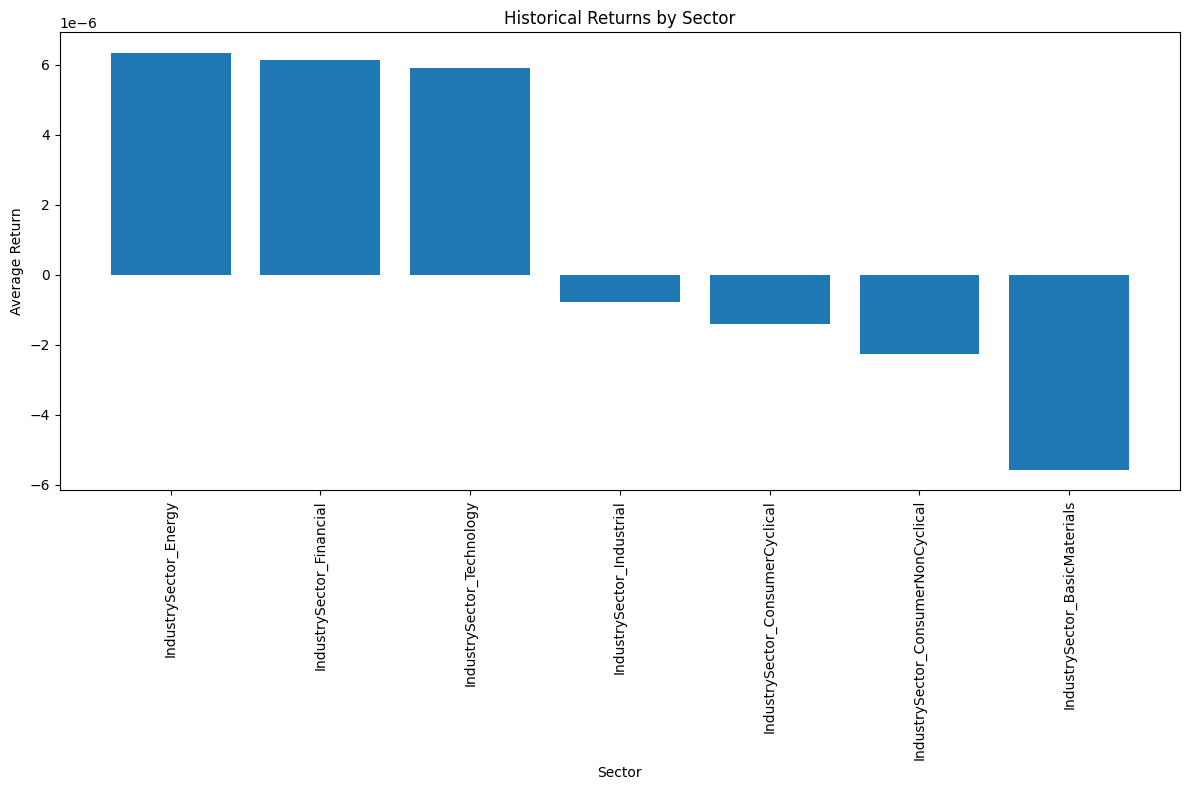

In [21]:

# Calculate historical returns for each sector
sector_returns = agg_data.groupby('sector')['return_1'].mean().reset_index()

# Sort sectors by average return in descending order
sector_returns = sector_returns.sort_values(by='return_1', ascending=False)

# Plot historical returns for each sector
plt.figure(figsize=(12, 8))
plt.bar(sector_returns['sector'], sector_returns['return_1'])
plt.xlabel('Sector')
plt.ylabel('Average Return')
plt.title('Historical Returns by Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#For each ticker, calculate the following:

1.Standard deviation of the daily closing price

2.Average daily return

In [22]:

# Calculate standard deviation and average daily return for each ticker
ticker_metrics = agg_data.groupby('ticker')[['mid', 'return_1']].agg({'mid': 'std', 'return_1': 'mean'}).reset_index()

# Rename columns
ticker_metrics = ticker_metrics.rename(columns={'mid': 'std_dev_daily_close', 'return_1': 'avg_daily_return'})

print(ticker_metrics)

  ticker  std_dev_daily_close  avg_daily_return
0    BCS             0.656911      1.492864e-07
1    ICE            12.790511      1.331907e-05
2   MNST             1.660285     -2.283240e-06
3    PDS             0.280884      1.399377e-05
4    PHG             1.286491     -7.711055e-07
5   RGLD             5.848668     -5.571354e-06
6    RGP             0.624916      3.903398e-06
7    SPF             0.413858     -1.414619e-06
8   STWD             1.633661      4.907663e-06
9    WFR             0.532519      5.902680e-06


#Calculate the correlation (using daily closing prices) between GOOG and AAPL.

In [24]:
# Reset index to move 'datetime' to a column
goog_data = agg_data[agg_data['ticker'] == 'GOOG'].reset_index()
aapl_data = agg_data[agg_data['ticker'] == 'AAPL'].reset_index()

# Filter required columns
goog_data = goog_data[['datetime', 'mid']]
aapl_data = aapl_data[['datetime', 'mid']]

# Rename columns for merging
goog_data = goog_data.rename(columns={'mid': 'mid_GOOG'})
aapl_data = aapl_data.rename(columns={'mid': 'mid_AAPL'})

# Merge data on datetime
merged_data = pd.merge(goog_data, aapl_data, on='datetime')

# Calculate correlation
correlation = merged_data['mid_GOOG'].corr(merged_data['mid_AAPL'])

print("Correlation between GOOG and AAPL:", correlation)

Correlation between GOOG and AAPL: nan


There was no correlation in closing prices between Google & Apple